# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


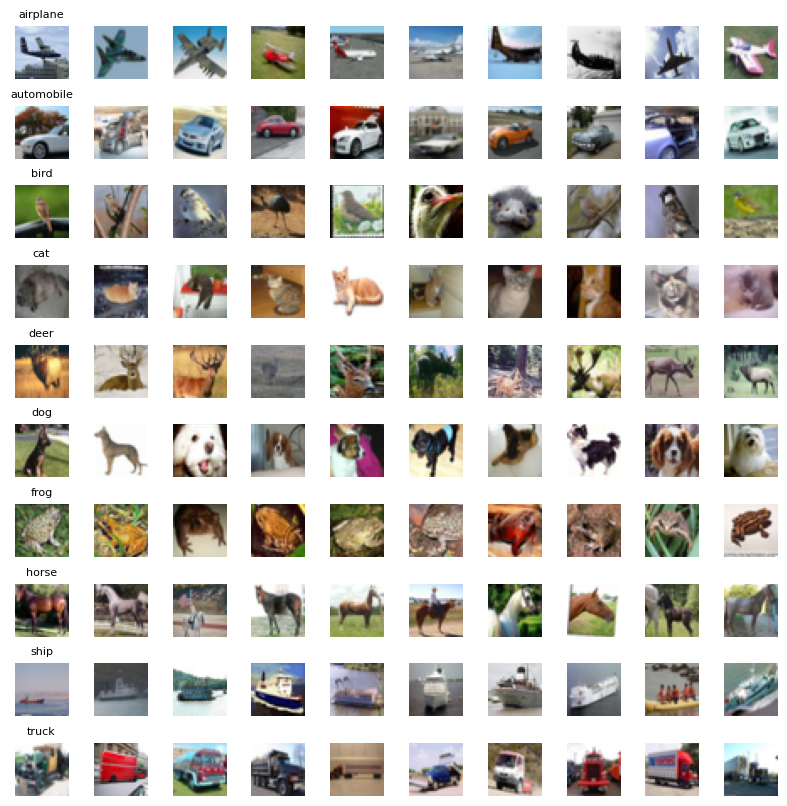

In [3]:

# Class names in CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Normalize images (scale pixel values between 0 and 1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

# Create a 10x10 plot
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
fig.subplots_adjust(hspace=0.5)

for i in range(10):
    class_indices = np.where(y_train.flatten() == i)[0]
    sample_indices = np.random.choice(class_indices, 10, replace=False)

    for j in range(10):
        ax = axes[i, j]
        ax.imshow(x_train[sample_indices[j]])
        ax.axis('off')
        if j == 0:
            ax.set_title(class_names[i], fontsize=8)

plt.show()


## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [4]:
from keras.backend import clear_session
clear_session()

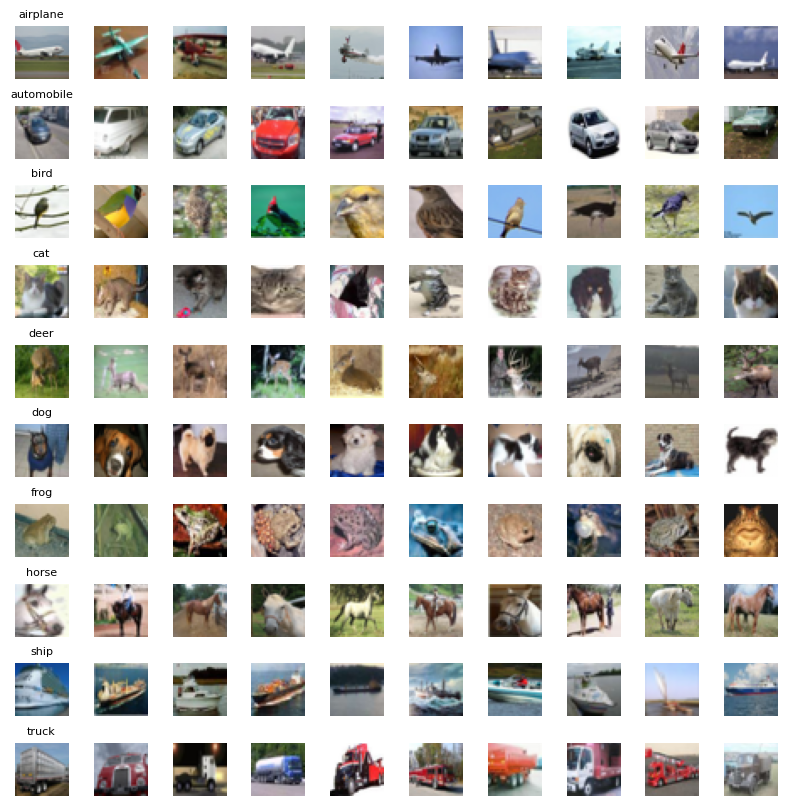

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         720,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Class names in CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Normalize images (scale pixel values between 0 and 1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

# Create a 10x10 plot
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
fig.subplots_adjust(hspace=0.5)

for i in range(10):
    class_indices = np.where(y_train.flatten() == i)[0]
    sample_indices = np.random.choice(class_indices, 10, replace=False)

    for j in range(10):
        ax = axes[i, j]
        ax.imshow(x_train[sample_indices[j]])
        ax.axis('off')
        if j == 0:
            ax.set_title(class_names[i], fontsize=8)

plt.show()

# Define CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [10]:
from tensorflow.keras.optimizers import SGD
# Define CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model using SGD optimizer
model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

# Train the model
history= model.fit(x_train, y_train_one_hot, epochs=50, batch_size=512, validation_data=(x_test, y_test_one_hot))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │         720,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.1645 - loss: 2.2576 - val_accuracy: 0.2322 - val_loss: 2.1594
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2549 - loss: 2.1264 - val_accuracy: 0.2892 - val_loss: 2.0515
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3022 - loss: 2.0209 - val_accuracy: 0.3151 - val_loss: 1.9607
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.3246 - loss: 1.9428 - val_accuracy: 0.3275 - val_loss: 1.9194
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3379 - loss: 1.8952 - val_accuracy: 0.3407 - val_loss: 1.8738
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3499 - loss: 1.8652 - val_accuracy: 0.3573 - val_loss: 1.8389
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3662 - loss: 1.8321 - val_accuracy: 0.3581 - val_loss: 1.8178
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3747 - loss: 1.8039 - val_accuracy: 0.3744 - v

*   Plot the cross entropy loss curve and the accuracy curve

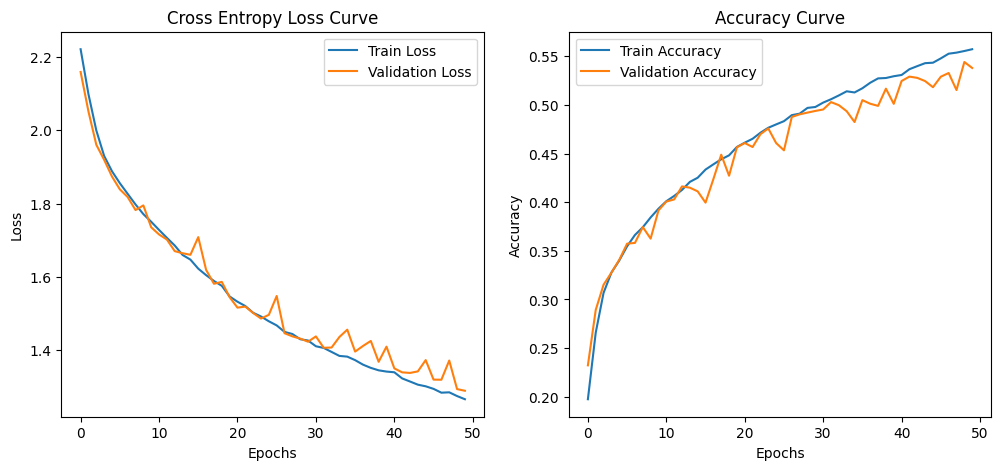

In [11]:
# Plot loss and accuracy curves
plt.figure(figsize=(12, 5))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Cross Entropy Loss Curve')
plt.legend()

# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.show()

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [12]:
from keras.backend import clear_session
clear_session()

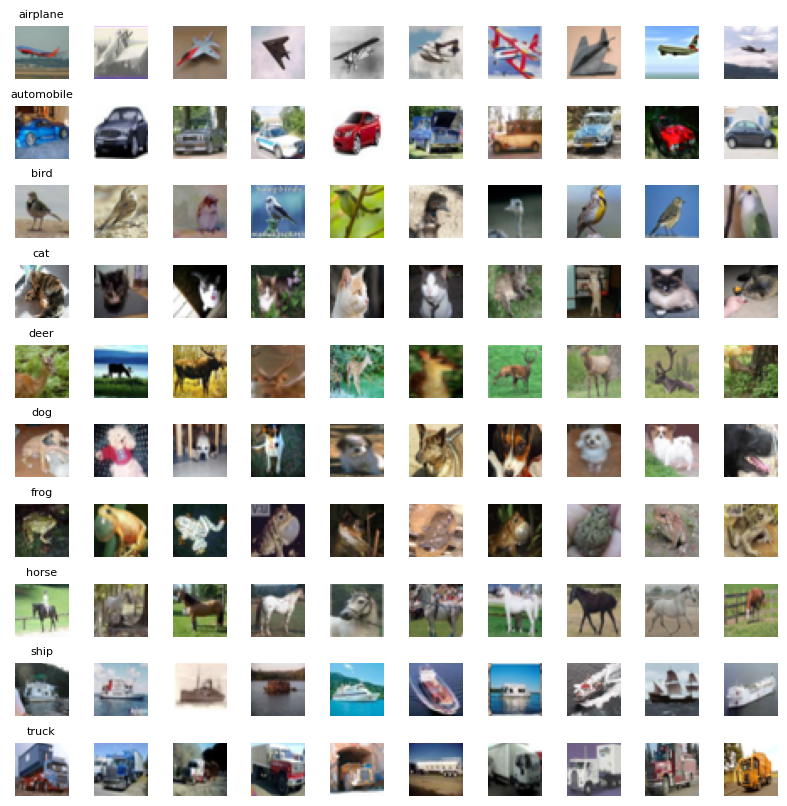

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Class names in CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Normalize images (scale pixel values between 0 and 1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

# Create a 10x10 plot
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
fig.subplots_adjust(hspace=0.5)

for i in range(10):
    class_indices = np.where(y_train.flatten() == i)[0]
    sample_indices = np.random.choice(class_indices, 10, replace=False)

    for j in range(10):
        ax = axes[i, j]
        ax.imshow(x_train[sample_indices[j]])
        ax.axis('off')
        if j == 0:
            ax.set_title(class_names[i], fontsize=8)

plt.show()

# Define a deeper VGG-like CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,060,138 (4.04 MB)

 Trainable params: 1,060,138 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - accuracy: 0.1570 - loss: 2.2848 - val_accuracy: 0.2031 - val_loss: 2.2053
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.2271 - loss: 2.1623 - val_accuracy: 0.2606 - val_loss: 2.0344
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.2904 - loss: 2.0047 - val_accuracy: 0.2943 - val_loss: 1.9790
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3197 - loss: 1.9391 - val_accuracy: 0.3464 - val_loss: 1.8671
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.3428 - loss: 1.8697 - val_accuracy: 0.3570 - val_loss: 1.8301
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3563 - loss: 1.8382 - val_accuracy: 0.3333 - val_loss: 1.8454
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3684 - loss: 1.7982 - val_accuracy: 0.3669 - val_loss: 1.7854
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.3835 - loss: 1.7666 - val_accuracy: 0.3833 - 

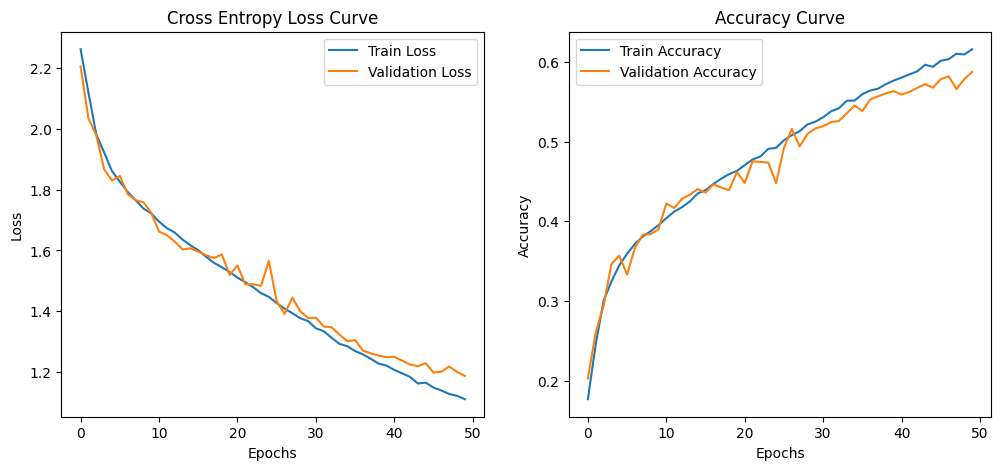

In [14]:
# Compile the model using SGD optimizer
model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

# Train the model
history = model.fit(x_train, y_train_one_hot, epochs=50, batch_size=512, validation_data=(x_test, y_test_one_hot))

# Plot loss and accuracy curves
plt.figure(figsize=(12, 5))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Cross Entropy Loss Curve')
plt.legend()

# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.show()


*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


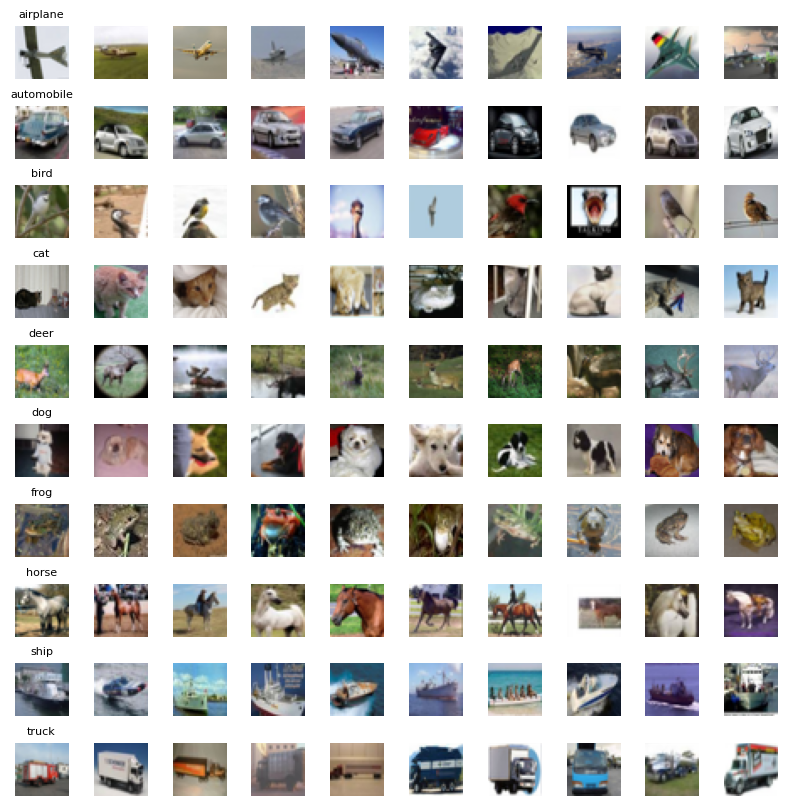

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.1751 - loss: 2.2606 - val_accuracy: 0.2488 - val_loss: 2.1354
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2684 - loss: 2.0984 - val_accuracy: 0.2947 - val_loss: 2.0093
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3024 - loss: 1.9846 - val_accuracy: 0.3261 - val_loss: 1.9345
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3276 - loss: 1.9224 - val_accuracy: 0.3278 - val_loss: 1.9049
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3373 - loss: 1.8899 - val_accuracy: 0.3378 - val_loss: 1.8632
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3569 - loss: 1.8488 - val_accuracy: 0.3592 - val_loss: 1.8438
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.3659 - loss: 1.8211 - val_accuracy: 0.3759 - val_loss: 1.7972
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.3776 - loss: 1.7916 - val_accuracy: 0.3758 - v

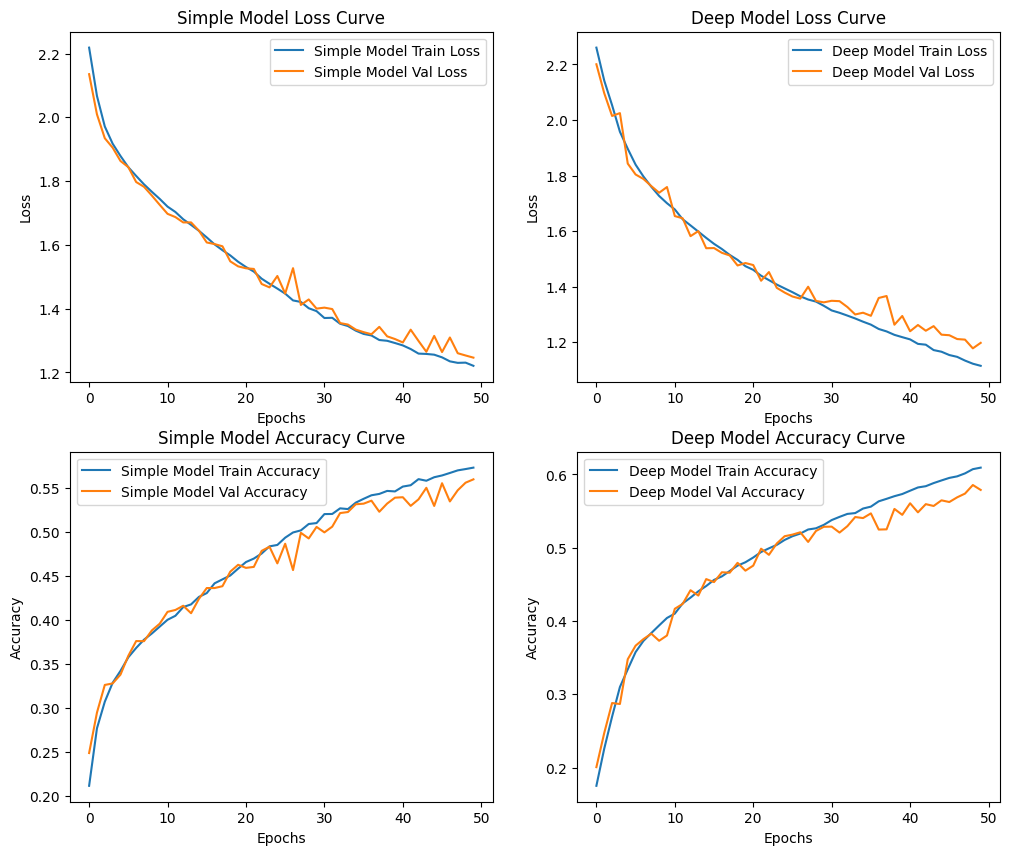

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Class names in CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Normalize images (scale pixel values between 0 and 1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

# Create a 10x10 plot
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
fig.subplots_adjust(hspace=0.5)

for i in range(10):
    class_indices = np.where(y_train.flatten() == i)[0]
    sample_indices = np.random.choice(class_indices, 10, replace=False)

    for j in range(10):
        ax = axes[i, j]
        ax.imshow(x_train[sample_indices[j]])
        ax.axis('off')
        if j == 0:
            ax.set_title(class_names[i], fontsize=8)

plt.show()

# Define the first simple CNN Model
model_simple = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the simple model
model_simple.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the simple model
history_simple = model_simple.fit(x_train, y_train_one_hot, epochs=50, batch_size=512, validation_data=(x_test, y_test_one_hot))

# Define a deeper VGG-like CNN Model
model_deep = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the deeper model
model_deep.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the deeper model
history_deep = model_deep.fit(x_train, y_train_one_hot, epochs=50, batch_size=512, validation_data=(x_test, y_test_one_hot))

# Compare loss and accuracy curves
plt.figure(figsize=(12, 10))

# Loss curve comparison
plt.subplot(2, 2, 1)
plt.plot(history_simple.history['loss'], label='Simple Model Train Loss')
plt.plot(history_simple.history['val_loss'], label='Simple Model Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Simple Model Loss Curve')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(history_deep.history['loss'], label='Deep Model Train Loss')
plt.plot(history_deep.history['val_loss'], label='Deep Model Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Deep Model Loss Curve')
plt.legend()

# Accuracy curve comparison
plt.subplot(2, 2, 3)
plt.plot(history_simple.history['accuracy'], label='Simple Model Train Accuracy')
plt.plot(history_simple.history['val_accuracy'], label='Simple Model Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Simple Model Accuracy Curve')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(history_deep.history['accuracy'], label='Deep Model Train Accuracy')
plt.plot(history_deep.history['val_accuracy'], label='Deep Model Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Deep Model Accuracy Curve')
plt.legend()

plt.show()



**Comment on the observation**

# Observations
The deeper model (VGG-like) is expected to generalize better and achieve higher validation accuracy."
If the deeper model shows signs of overfitting (large gap between train and validation accuracy), regularization techniques may be needed.
The simple model may converge faster but might not extract as rich features as the deeper model."

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


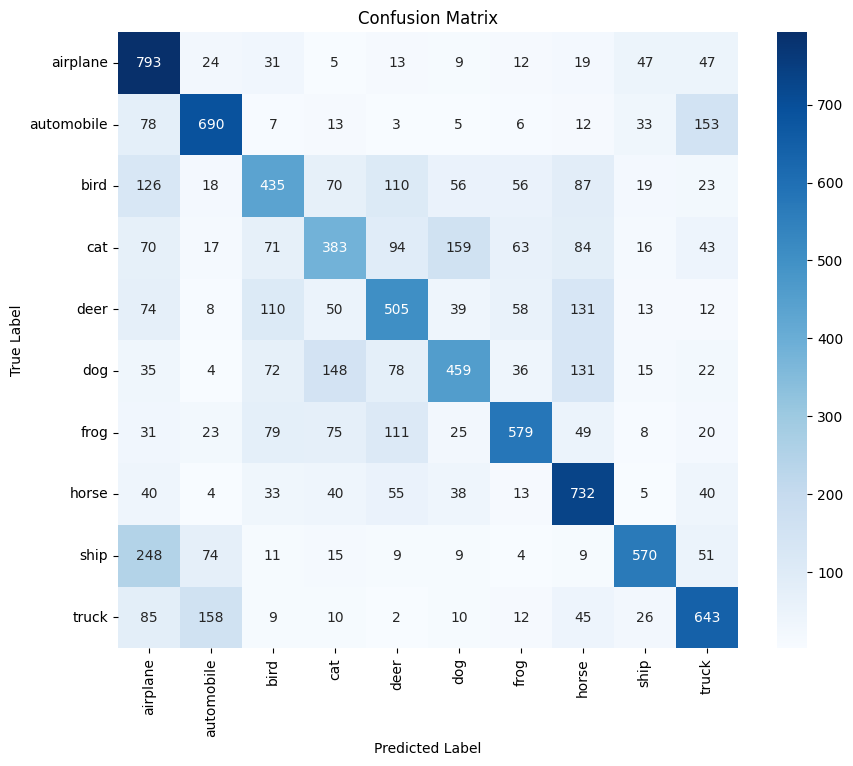

In [18]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Predict on test data
y_pred = model_deep.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = y_test.flatten()

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


**Comment here :**

The confusion matrix highlights which classes are most commonly misclassified.
Diagonal values indicate correct predictions, while off-diagonal values show misclassifications.
If certain classes are frequently confused (e.g., cats and dogs), additional data augmentation or deeper architectures might be needed."


...

*    Print the test accuracy for the trained model.

In [19]:
# Evaluate model on test data
test_loss, test_accuracy = model_deep.evaluate(x_test, y_test_one_hot, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.5789


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [20]:
from keras.backend import clear_session
clear_session()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import InputLayer
import tensorflow as tf

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Resize images to 64x64
x_train = tf.image.resize(x_train, (64, 64)).numpy()
x_test = tf.image.resize(x_test, (64, 64)).numpy()

# Class names in CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Normalize images (scale pixel values between 0 and 1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

# Define a deeper CNN Model
model_deep = Sequential([
    InputLayer(input_shape=(64, 64, 3)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 114s 846ms/step - accuracy: 0.1204 - loss: 2.2983 - val_accuracy: 0.1183 - val_loss: 2.2858
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 37s 380ms/step - accuracy: 0.1405 - loss: 2.2755 - val_accuracy: 0.2121 - val_loss: 2.1997
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 371ms/step - accuracy: 0.2122 - loss: 2.1703 - val_accuracy: 0.2461 - val_loss: 2.1435
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 42s 380ms/step - accuracy: 0.2418 - loss: 2.1082 - val_accuracy: 0.2609 - val_loss: 2.0471
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 369ms/step - accuracy: 0.2818 - loss: 2.0330 - val_accuracy: 0.3283 - val_loss: 1.8961
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 42s 378ms/step - accuracy: 0.3166 - loss: 1.9403 - val_accuracy: 0.3537 - val_loss: 1.8089
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 37s 374ms/step - accuracy: 0.3500 - loss: 1.8466 - val_accuracy: 0.3663 - val_loss: 1.7899
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 37s 374ms/step - accuracy: 0.3804 - loss: 1.7690 - val_acc

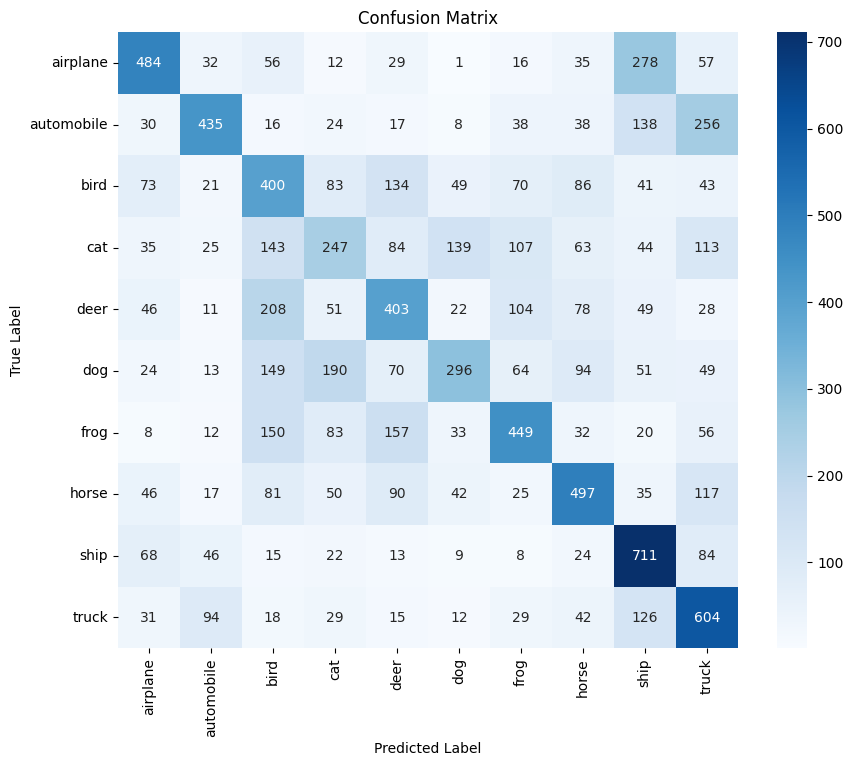

In [2]:
# Compile the deeper model
model_deep.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the deeper model
history_deep = model_deep.fit(x_train, y_train_one_hot, epochs=10, batch_size=512, validation_data=(x_test, y_test_one_hot))

# Evaluate model on test data
test_loss, test_accuracy = model_deep.evaluate(x_test, y_test_one_hot, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predict on test data
y_pred = model_deep.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = y_test.flatten()

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:

Activation functions introduce non-linearity into the network, enabling it to learn complex patterns and relationships in data.
Without activation functions, the network would behave as a simple linear model, limiting its ability to solve complex problems.
_

2 - Key Differences between sigmoid and softmax:

Sigmoid outputs values between 0 and 1 for each neuron, making it suitable for binary classification.
Softmax normalizes the outputs across multiple classes, ensuring they sum up to 1, making it suitable for multi-class classification.


_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:

Categorical crossentropy is used for multi-class classification problems where there are more than two categories."
Binary crossentropy is used for binary classification problems where there are only two categories.

_
